# **PROJECT PROCESS**

1. Importing the Required lib
2. Importing the DataSet
3. Studing The Data
4. Data Cleaning

# **1.IMPORTING THE REQUIRED LIB**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

# **2.IMPORTING THE DATASET**

In [2]:
df=pd.read_csv("Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# **3.STUDING THE DATA**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [5]:
df.describe(include='object')

,Surname,Geography,Gender
count,10000,10000,10000
unique,2932,3,2
top,Smith,France,Male
freq,32,5014,5457


In [6]:
no_rows,no_columns=df.shape
print('Number of Rows:',no_rows)
print('Numbeer of columns:',no_columns)

Number of Rows: 10000
Numbeer of columns: 14


In [7]:
# Seeing the number unique values
for i in df.columns:
    print('COLUMN NAME:',i)
    print('Number of unique values:',df[i].nunique())
    a=df[i].nunique()
    if a <= 10 :
        print(df[i].value_counts())
    print('---------------------------------')

COLUMN NAME: RowNumber
Number of unique values: 10000
---------------------------------
COLUMN NAME: CustomerId
Number of unique values: 10000
---------------------------------
COLUMN NAME: Surname
Number of unique values: 2932
---------------------------------
COLUMN NAME: CreditScore
Number of unique values: 460
---------------------------------
COLUMN NAME: Geography
Number of unique values: 3
Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64
---------------------------------
COLUMN NAME: Gender
Number of unique values: 2
Gender
Male      5457
Female    4543
Name: count, dtype: int64
---------------------------------
COLUMN NAME: Age
Number of unique values: 70
---------------------------------
COLUMN NAME: Tenure
Number of unique values: 11
---------------------------------
COLUMN NAME: Balance
Number of unique values: 6382
---------------------------------
COLUMN NAME: NumOfProducts
Number of unique values: 4
NumOfProducts
1    5084
2    4590
3   

In [8]:
## Getting All Different Types OF Features
num_features = [feature for feature in df.columns if df[feature].dtype != 'O']
print('Num of Numerical Features :', len(num_features))
cat_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print('Num of Categorical Features :', len(cat_features))
discrete_features=[feature for feature in num_features if len(df[feature].unique())<=25]
print('Num of Discrete Features :',len(discrete_features))
continuous_features=[feature for feature in num_features if feature not in discrete_features]
print('Num of Continuous Features :',len(continuous_features))

Num of Numerical Features : 11
Num of Categorical Features : 3
Num of Discrete Features : 5
Num of Continuous Features : 6


# **4.DATA CLEANING**
4.1. Checking for Null Values 

## 4.1. Checking For Null Values

In [9]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

we don't have any null values

## 4.2 Checking For The Duplicated Rows

In [10]:
print(df.duplicated().sum())

0


we don't have any duplicated rows

## 4.3 Checking the Data Type

In [11]:
for col in df.columns:
    types_in_col = df[col].map(type).nunique()
    if types_in_col > 1:
        unique_types = df[col].map(type).unique()
        print(f"Column '{col}' has mixed data types: {[t.__name__ for t in unique_types]}")

The values inside each column have the same datatype

## 4.4 Checking For The Outliers

________________________________________________________________________

Column: RowNumber
Lower bound: -4998.5
Upper bound: 14999.5
Outliers:
Empty DataFrame
Columns: [RowNumber]
Index: []


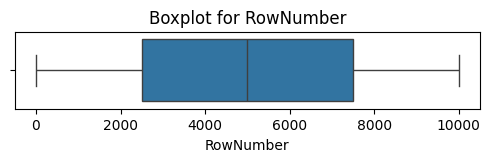

________________________________________________________________________

Column: CustomerId
Lower bound: 15441470.0
Upper bound: 15940292.0
Outliers:
Empty DataFrame
Columns: [CustomerId]
Index: []


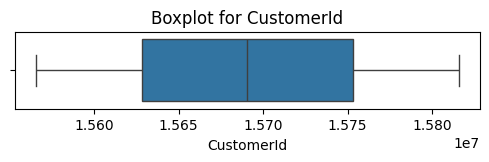

________________________________________________________________________

Column: CreditScore
Lower bound: 383.0
Upper bound: 919.0
Outliers:
      CreditScore
7             376
942           376
1193          363
1405          359
1631          350
1838          350
1962          358
2473          351
2579          365
8154          367
8723          350
8762          350
9210          382
9356          373
9624          350


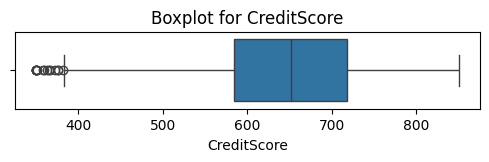

________________________________________________________________________

Column: Age
Lower bound: 14.0
Upper bound: 62.0
Outliers:
      Age
58     66
85     75
104    65
158    73
181    65
...   ...
9753   68
9765   64
9832   64
9894   77
9936   77

[359 rows x 1 columns]


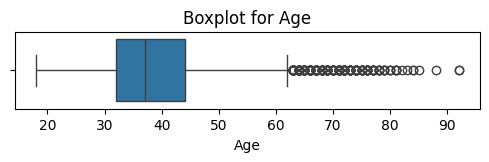

________________________________________________________________________

Column: Balance
Lower bound: -191466.36000000002
Upper bound: 319110.60000000003
Outliers:
Empty DataFrame
Columns: [Balance]
Index: []


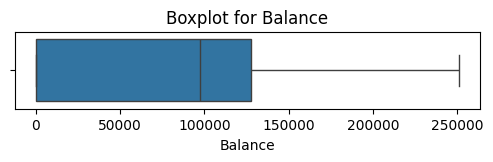

________________________________________________________________________

Column: EstimatedSalary
Lower bound: -96577.09624999999
Upper bound: 296967.45375
Outliers:
Empty DataFrame
Columns: [EstimatedSalary]
Index: []


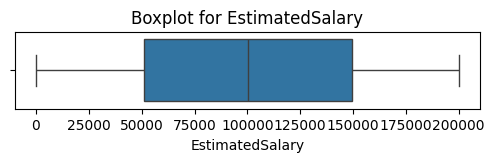

In [12]:
for col in df[continuous_features].columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print('________________________________________________________________________')
    print(f"\nColumn: {col}")
    print(f"Lower bound: {lower_bound}")
    print(f"Upper bound: {upper_bound}")
    print(f"Outliers:\n{outliers[[col]]}")

    # Boxplot
    plt.figure(figsize=(6, 1))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot for {col}')
    plt.show()


# **6.FEATURE SELECTION**
### Hypothesis Testing
#### Target Column : Exited (Binary Categorical)

In [13]:
print(df['Exited'].unique())

[1 0]


## 6.1. Feature Selection Between Continuous & Binary Columns :- T-Test

In [14]:
from scipy.stats import ttest_ind
continuous_features_rejected=[]
for i in continuous_features :
    print(f"Column Name {i}")
    # Group by Exited
    class_0 = df[df['Exited'] == 0][i]
    class_1 = df[df['Exited'] == 1][i]
    
    # t-test,p-val
    t_stat, p_val = ttest_ind(class_0,class_1)
    
    print('P-value:', p_val)
    
    if p_val < 0.05:
        print("Reject Null Hypothesis")
    else:
        print("Fail to Reject Null Hypothesis")
        continuous_features_rejected.append(i)
    print()
    print("-"*100)

Column Name RowNumber
P-value: 0.09751062762970515
Fail to Reject Null Hypothesis

----------------------------------------------------------------------------------------------------
Column Name CustomerId
P-value: 0.5321504747600249
Fail to Reject Null Hypothesis

----------------------------------------------------------------------------------------------------
Column Name CreditScore
P-value: 0.006738213892192373
Reject Null Hypothesis

----------------------------------------------------------------------------------------------------
Column Name Age
P-value: 1.2399313093427736e-186
Reject Null Hypothesis

----------------------------------------------------------------------------------------------------
Column Name Balance
P-value: 1.2755633191525477e-32
Reject Null Hypothesis

----------------------------------------------------------------------------------------------------
Column Name EstimatedSalary
P-value: 0.22644042802223355
Fail to Reject Null Hypothesis

-------------

In [15]:
continuous_features_rejected

['RowNumber', 'CustomerId', 'EstimatedSalary']

In [16]:
print(f"Number Countinuous Features : {len(continuous_features)}")
print(f"Number Countinuous Features Failed in T-test : {len(continuous_features_rejected)}")

Number Countinuous Features : 6
Number Countinuous Features Failed in T-test : 3


## 6.2.Feature Selection for Categorical and Categorical:- Chi-Square

In [17]:
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest
y=df['Exited']

In [18]:
discrete_df=df[discrete_features]
discrete_df

,Tenure,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,2,1,1,1,1
1,1,1,0,1,0
2,8,3,1,0,1
3,1,2,0,0,0
4,2,1,1,1,0
...,...,...,...,...,...
9995,5,2,1,0,0
9996,10,1,1,1,0
9997,7,1,0,1,1
9998,3,2,1,0,1


In [19]:
discrete_features_failed_chi=[]
chi_scores,p_values=chi2(discrete_df,y)
alpha=0.5
for feature, score, p_val in zip(discrete_df.columns, chi_scores, p_values):
    print(f"Feature: {feature}")
    print(f"  Chi-Square Score = {score:.4f}")
    print(f"  p-value = {p_val:.4f}")
    if p_val < alpha:
        print("  ➤ Reject H₀: Feature is dependent on the target variable.\n")
    else:
        print("  ➤ Fail to Reject H₀: Feature is independent of the target variable.\n")
        discrete_features_failed_chi.append(feature)

Feature: Tenure
  Chi-Square Score = 3.2705
  p-value = 0.0705
  ➤ Reject H₀: Feature is dependent on the target variable.

Feature: NumOfProducts
  Chi-Square Score = 5.0554
  p-value = 0.0245
  ➤ Reject H₀: Feature is dependent on the target variable.

Feature: HasCrCard
  Chi-Square Score = 0.1500
  p-value = 0.6985
  ➤ Fail to Reject H₀: Feature is independent of the target variable.

Feature: IsActiveMember
  Chi-Square Score = 118.1994
  p-value = 0.0000
  ➤ Reject H₀: Feature is dependent on the target variable.

Feature: Exited
  Chi-Square Score = 7963.0000
  p-value = 0.0000
  ➤ Reject H₀: Feature is dependent on the target variable.



In [20]:
discrete_features_failed_chi

['HasCrCard']

In [21]:
print(f"Number Discrete Features : {len(discrete_features)}")
print(f"Number Discrete Features Failed in Chi-Square : {len(discrete_features_failed_chi)}")

Number Discrete Features : 5
Number Discrete Features Failed in Chi-Square : 1


### From Feature Selection:

Columns failed in Hypothesis Test

In [22]:
print(continuous_features_rejected)

['RowNumber', 'CustomerId', 'EstimatedSalary']


In [23]:
print(discrete_features_failed_chi)

['HasCrCard']


## 6.3. Removing the Cloumns Failed in Hypothesis Test:

In [24]:
print(f"------------Number columns Before Removing : {len(df.columns)}------------")
print()

# removing countinuous features failed in t-test
print(f"Number Countinuous Features : {len(continuous_features)}")
print(f"Number Countinuous Features Failed in T-test : {len(continuous_features_rejected)}")
for i in continuous_features_rejected:
    df.drop(columns=[i],inplace=True)
print(f"------------Number columns After Removing Countinuous Feature Failed in T-Test: {len(df.columns)}------------")
print()

# removing the Discrete Features
print(f"Number Discrete Features : {len(discrete_features)}")
print(f"Number Discrete Features Failed in Chi-Square : {len(discrete_features_failed_chi)}")
for i in discrete_features_failed_chi:
    df.drop(columns=[i],inplace=True)
print(f"------------Number columns After Removing Discrete Feature Failed in Chi-Square: {len(df.columns)}------------")
print()

# removing the surename:
print("Let's remove the sure name as it is not give any information for the target column")
df.drop(columns=['Surname'],inplace=True)
print(f"------------Number columns After Removing : {len(df.columns)}------------")

------------Number columns Before Removing : 14------------

Number Countinuous Features : 6
Number Countinuous Features Failed in T-test : 3
------------Number columns After Removing Countinuous Feature Failed in T-Test: 11------------

Number Discrete Features : 5
Number Discrete Features Failed in Chi-Square : 1
------------Number columns After Removing Discrete Feature Failed in Chi-Square: 10------------

Let's remove the sure name as it is not give any information for the target column
------------Number columns After Removing : 9------------


# **7.SPLITTING**

In [25]:
y=df['Exited']
x=df.drop(columns=['Exited'])

In [26]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [27]:
x

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,IsActiveMember
0,619,France,Female,42,2,0.00,1,1
1,608,Spain,Female,41,1,83807.86,1,1
2,502,France,Female,42,8,159660.80,3,0
3,699,France,Female,39,1,0.00,2,0
4,850,Spain,Female,43,2,125510.82,1,1
...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,0
9996,516,France,Male,35,10,57369.61,1,1
9997,709,France,Female,36,7,0.00,1,1
9998,772,Germany,Male,42,3,75075.31,2,0


In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

# **8.ENCODING**

In [29]:
x

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,IsActiveMember
0,619,France,Female,42,2,0.00,1,1
1,608,Spain,Female,41,1,83807.86,1,1
2,502,France,Female,42,8,159660.80,3,0
3,699,France,Female,39,1,0.00,2,0
4,850,Spain,Female,43,2,125510.82,1,1
...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,0
9996,516,France,Male,35,10,57369.61,1,1
9997,709,France,Female,36,7,0.00,1,1
9998,772,Germany,Male,42,3,75075.31,2,0


In [30]:
from sklearn.preprocessing import LabelEncoder
label_Gender=LabelEncoder()
label_Geopraphy=LabelEncoder()

In [31]:
x_train['Gender']=label_Gender.fit_transform(x_train['Gender'])
x_test['Gender']=label_Gender.transform(x_test['Gender'])


x_train['Geography']=label_Geopraphy.fit_transform(x_train['Geography'])
x_test['Geography']=label_Geopraphy.transform(x_test['Geography'])

In [32]:
x_train

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,IsActiveMember
4901,673,0,1,59,0,178058.06,2,1
4375,850,1,1,41,8,60880.68,1,0
6698,725,0,0,31,6,0.00,1,0
9805,644,0,1,33,7,174571.36,1,1
1101,703,2,1,29,9,0.00,2,0
...,...,...,...,...,...,...,...,...
5734,768,0,1,54,8,69712.74,1,1
5191,682,0,0,58,1,0.00,1,1
5390,735,0,0,38,1,0.00,3,0
860,667,0,1,43,8,190227.46,1,0


In [33]:
x_test

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,IsActiveMember
6252,596,1,1,32,3,96709.07,2,0
4684,623,0,1,43,1,0.00,2,1
1731,601,2,0,44,4,0.00,2,0
4742,506,1,1,59,8,119152.10,2,1
4521,560,2,0,27,7,124995.98,1,1
...,...,...,...,...,...,...,...,...
4862,645,2,0,55,1,133676.65,1,1
7025,569,2,0,51,3,0.00,3,0
7647,768,0,1,25,0,78396.08,1,1
7161,690,0,0,36,6,110480.48,1,0


# **9. HANDLING THE IMBALANCE DATASET**

In [34]:
y_train.value_counts()

Exited
0    5960
1    1540
Name: count, dtype: int64

In [35]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_train_sampled, y_train_sampled = smote.fit_resample(x_train, y_train)

In [36]:
y_train_sampled.value_counts()

Exited
1    5960
0    5960
Name: count, dtype: int64

# **10.SCALING**

In [37]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaler=scaler.fit_transform(x_train_sampled)
x_test_scaler=scaler.transform(x_test)

In [38]:
print("len of x_train_scaler:",len(x_train_scaler))
print("len of y_train_sampled:",len(y_train_sampled))
print("len of x_text_scaler:",len(x_test_scaler))
print("len of y_test_sampled:",len(y_test))

len of x_train_scaler: 11920
len of y_train_sampled: 11920
len of x_text_scaler: 2500
len of y_test_sampled: 2500


# **11.MACHINE LEARNING MODEL**
### just for pratice purpose

In [39]:
# Importing the models
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay,precision_score, recall_score, f1_score, roc_auc_score,roc_curve 

In [40]:
results = []

models={
    "Logisitic Regression":LogisticRegression(),
    "SVM":svm.SVC(),
    "KNN":KNeighborsClassifier(),
    "Decision Tree":DecisionTreeClassifier(),
    "Random Forest":RandomForestClassifier(),
    "AdaBoost":AdaBoostClassifier(),
    "Gradient Boost": GradientBoostingClassifier(),
    "XG Boost": XGBClassifier()
}
model_name=list(models.keys())

for i in range(len(list(models))):
    model = list(models.values())[i]
    
    if model_name=="Decision Tree" or "Random Forest" or"AdaBoost" or"Gradient Boost" or "XG Boost":
        # Model Training
        model.fit(x_train_sampled, y_train_sampled)
        # Make predictions:
        y_train_pred = model.predict(x_train_sampled)
        y_test_pred = model.predict(x_test)
    else:
        # Model Training
        model.fit(x_train_scaler, y_train_sampled)
        # Make predictions:
        y_train_pred = model.predict(x_train_scaler)
        y_test_pred = model.predict(x_test_scaler)

    
    # Training set performance
    model_train_accuracy = accuracy_score(y_train_sampled, y_train_pred) # Calculate Accuracy
    model_train_f1 = f1_score(y_train_sampled, y_train_pred, average='weighted') # Calculate F1-score
    model_train_precision = precision_score(y_train_sampled, y_train_pred) # Calculate Precision
    model_train_recall = recall_score(y_train_sampled, y_train_pred) # Calculate Recall
    model_train_rocauc_score = roc_auc_score(y_train_sampled, y_train_pred)


    # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score
    model_test_precision = precision_score(y_test, y_test_pred) # Calculate Precision
    model_test_recall = recall_score(y_test, y_test_pred) # Calculate Recall
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred) #Calculate Roc


    print(f"-------{list(models.keys())[i]}-------")
    
    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 score: {:.4f}'.format(model_train_f1))
    
    print('- Precision: {:.4f}'.format(model_train_precision))
    print('- Recall: {:.4f}'.format(model_train_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))

    
    
    print('----------------------------------')
    
    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- F1 score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))


    
    print('----------------------------------')
    print(classification_report(y_test,y_test_pred))

    results.append({
        "Model": model_name[i],
        "Train Accuracy": model_train_accuracy,
        "Test Accuracy": model_test_accuracy,
        "Test F1 Score": model_test_f1,
        "Test Recall": model_test_recall
    })

    
    print('='*35)
    print('\n')

results_df = pd.DataFrame(results)

-------Logisitic Regression-------
Model performance for Training set
- Accuracy: 0.7625
- F1 score: 0.7625
- Precision: 0.7561
- Recall: 0.7750
- Roc Auc Score: 0.7625
----------------------------------
Model performance for Test set
- Accuracy: 0.7236
- F1 score: 0.7439
- Precision: 0.3763
- Recall: 0.5936
- Roc Auc Score: 0.6747
----------------------------------
              precision    recall  f1-score   support

           0       0.88      0.76      0.81      2003
           1       0.38      0.59      0.46       497

    accuracy                           0.72      2500
   macro avg       0.63      0.67      0.64      2500
weighted avg       0.78      0.72      0.74      2500



-------SVM-------
Model performance for Training set
- Accuracy: 0.5754
- F1 score: 0.5610
- Precision: 0.5554
- Recall: 0.7564
- Roc Auc Score: 0.5754
----------------------------------
Model performance for Test set
- Accuracy: 0.4560
- F1 score: 0.4952
- Precision: 0.2315
- Recall: 0.7485
- Roc Auc

In [41]:
results_df.sort_values('Test F1 Score',ascending =False)

,Model,Train Accuracy,Test Accuracy,Test F1 Score,Test Recall
4,Random Forest,0.999832,0.8184,0.824983,0.655936
7,XG Boost,0.933557,0.8160,0.823459,0.665996
6,Gradient Boost,0.840856,0.8120,0.821476,0.696177
5,AdaBoost,0.810738,0.7828,0.797435,0.706237
3,Decision Tree,0.999832,0.7556,0.771443,0.623742
0,Logisitic Regression,0.762500,0.7236,0.743898,0.593561
2,KNN,0.818876,0.6060,0.643812,0.511066
1,SVM,0.575419,0.4560,0.495244,0.748491


# **12.DEEP-LEARNING MODEL**

In [42]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping,TensorBoard
import datetime

In [43]:
model=Sequential(
    [
        Dense(64,activation='relu',input_shape=(x_train.shape[1],)),
        Dense(32,activation='relu'),
        Dense(1,activation='sigmoid')
    ]
)

In [44]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                576       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2689 (10.50 KB)
Trainable params: 2689 (10.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [45]:
# compile model
opt=tensorflow.keras.optimizers.Adam(learning_rate=0.01)
los=tensorflow.keras.losses.BinaryCrossentropy()


In [46]:
model.compile(optimizer=opt,loss=los,metrics=['accuracy'])

In [47]:
# set up the tensorboard
log_dir="log/fit" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorflow_callback=TensorBoard(log_dir=log_dir,histogram_freq=1)

In [48]:
# early stoping
early_stoping_callback=EarlyStopping(monitor='val_loss',patience=10,restore_best_weights=True)

In [49]:
history=model.fit(
    x_train_scaler,y_train_sampled,validation_data=(x_test_scaler,y_test),epochs=100,
    callbacks=[tensorflow_callback,early_stoping_callback]
)

Epoch 1/100


373/373 [==============================] - 2s 4ms/step - loss: 0.4315 - accuracy: 0.8009 - val_loss: 0.4260 - val_accuracy: 0.8140
Epoch 2/100
373/373 [==============================] - 1s 3ms/step - loss: 0.3998 - accuracy: 0.8223 - val_loss: 0.4249 - val_accuracy: 0.8088
Epoch 3/100
373/373 [==============================] - 1s 3ms/step - loss: 0.3928 - accuracy: 0.8258 - val_loss: 0.4373 - val_accuracy: 0.8072
Epoch 4/100
373/373 [==============================] - 1s 3ms/step - loss: 0.3888 - accuracy: 0.8264 - val_loss: 0.4136 - val_accuracy: 0.8216
Epoch 5/100
373/373 [==============================] - 1s 3ms/step - loss: 0.3856 - accuracy: 0.8321 - val_loss: 0.4294 - val_accuracy: 0.8076
Epoch 6/100
373/373 [==============================] - 1s 3ms/step - loss: 0.3815 - accuracy: 0.8296 - val_loss: 0.4201 - val_accuracy: 0.8092
Epoch 7/100
373/373 [==============================] - 1s 3ms/step - loss: 0.3804 - accuracy: 0.8307 - val_loss: 0.4145 - val_accuracy: 0.81

In [68]:
x_train['NumOfProducts'].min()

1

In [51]:
new_input={
    "CreditScore":[600],
    "Geography":['France'],
    "Gender":['Male'],
    "Age":[40],
    "Tenure":[3],
    "Balance":[60000],
    "NumOfProducts":[3],
    "IsActiveMember":[0]

}

In [52]:
new_input=pd.DataFrame(new_input)
new_input

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,IsActiveMember
0,600,France,Male,40,3,60000,3,0


In [53]:
new_input["Geography"]=label_Geopraphy.transform(new_input["Geography"])
new_input["Gender"]=label_Gender.transform(new_input["Gender"])

In [54]:
new_input=scaler.transform(new_input)

In [55]:
prediction=model.predict(new_input)
prediction

1/1 [==============================] - 0s 105ms/step


array([[0.9749616]], dtype=float32)

In [56]:
pred=prediction[0][0]*100

In [57]:
print(f"The Customer Like To Churn {pred}%")

The Customer Like To Churn 97.49615788459778%


# **13.PICKLING**

In [69]:
import pickle

model.save("model.h5")

with open('scaler.pkl','wb') as file :
    pickle.dump(scaler,file)

with open('gender_encoder.pkl','wb') as file :
    pickle.dump(label_Gender,file)

with open('Geopraphy_encoder.pkl','wb') as file :
    pickle.dump(label_Geopraphy,file)


In [75]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,IsActiveMember,Exited
0,619,France,Female,42,2,0.00,1,1,1
1,608,Spain,Female,41,1,83807.86,1,1,0
2,502,France,Female,42,8,159660.80,3,0,1
3,699,France,Female,39,1,0.00,2,0,0
4,850,Spain,Female,43,2,125510.82,1,1,0
...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,0,0
9996,516,France,Male,35,10,57369.61,1,1,0
9997,709,France,Female,36,7,0.00,1,1,1
9998,772,Germany,Male,42,3,75075.31,2,0,1
